# Challenge Set 1: MTA Turnstile Data

Field Description

C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS


C/A      = Control Area (A002)
UNIT     = Remote Unit for a station (R051)
SCP      = Subunit Channel Position represents an specific address for a device (02-00-00)
STATION  = Represents the station name the device is located at
LINENAME = Represents all train lines that can be boarded at this station
           Normally lines are represented by one character.  LINENAME 456NQR repersents train server for 4, 5, 6, N, Q, and R trains.
DIVISION = Represents the Line originally the station belonged to BMT, IRT, or IND   
DATE     = Represents the date (MM-DD-YY)
TIME     = Represents the time (hh:mm:ss) for a scheduled audit event
DESc     = Represent the "REGULAR" scheduled audit event (Normally occurs every 4 hours)
           1. Audits may occur more that 4 hours due to planning, or troubleshooting activities. 
           2. Additionally, there may be a "RECOVR AUD" entry: This refers to a missed audit that was recovered. 
ENTRIES  = The comulative entry register value for a device
EXIST    = The cumulative exit register value for a device



Example:
The data below shows the entry/exit register values for one turnstile at control area (A002) from 09/27/14 at 00:00 hours to 09/29/14 at 00:00 hours

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
import datetime 

%matplotlib inline

#### Exercise 1.1

- Open up a new Jupyter notebook
- Download a few MTA turnstile data files
- Open up a file, use csv reader to read it, make a python dict where
  there is a key for each (C/A, UNIT, SCP, STATION). These are the
  first four columns. The value for this key should be a list of
  lists. Each list in the list is the rest of the columns in a
  row. For example, one key-value pair should look like


{    ('A002','R051','02-00-00','LEXINGTON AVE'):
[
['NQR456', 'BMT', '01/03/2015', '03:00:00', 'REGULAR', '0004945474', '0001675324'],
['NQR456', 'BMT', '01/03/2015', '07:00:00', 'REGULAR', '0004945478', '0001675333'],
['NQR456', 'BMT', '01/03/2015', '11:00:00', 'REGULAR', '0004945515', '0001675364'],
...
]
}

In [140]:
#Import 3 weeks of data into Dataframe, concat them together

url1 = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_160917.txt'
url2 = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_160910.txt'
url3 = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_160903.txt'
import csv

def get_data_from_mta(file_url):
    data = pd.read_csv(file_url)
    return data

df1 = get_data_from_mta(url1)
df2 = get_data_from_mta(url2)
df3 = get_data_from_mta(url3)

data = pd.concat([df1,df2,df3],ignore_index=True)
data.head(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456,BMT,09/10/2016,00:00:00,REGULAR,5817505,1971936
1,A002,R051,02-00-00,59 ST,NQR456,BMT,09/10/2016,04:00:00,REGULAR,5817544,1971940
2,A002,R051,02-00-00,59 ST,NQR456,BMT,09/10/2016,08:00:00,REGULAR,5817564,1971981
3,A002,R051,02-00-00,59 ST,NQR456,BMT,09/10/2016,12:00:00,REGULAR,5817678,1972094
4,A002,R051,02-00-00,59 ST,NQR456,BMT,09/10/2016,16:00:00,REGULAR,5817925,1972180


In [141]:
#Check to make sure I pulled 3 weeks worth of data
print("Data Results:", data.ENTRIES.size)

Data Results: 580895


In [142]:
#Checking if whether there are any formatting issues in the column names
data.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [143]:
#Clean up whitespace from EXIT"
data.columns = [column.strip() for column in data.columns] 

In [144]:
data.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [145]:
data.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456,BMT,09/10/2016,00:00:00,REGULAR,5817505,1971936
1,A002,R051,02-00-00,59 ST,NQR456,BMT,09/10/2016,04:00:00,REGULAR,5817544,1971940
2,A002,R051,02-00-00,59 ST,NQR456,BMT,09/10/2016,08:00:00,REGULAR,5817564,1971981
3,A002,R051,02-00-00,59 ST,NQR456,BMT,09/10/2016,12:00:00,REGULAR,5817678,1972094
4,A002,R051,02-00-00,59 ST,NQR456,BMT,09/10/2016,16:00:00,REGULAR,5817925,1972180


In [146]:
#Three weeks of data
data.DATE.value_counts().sort_index()

08/27/2016    27290
08/28/2016    27300
08/29/2016    27828
08/30/2016    27775
08/31/2016    27352
09/01/2016    28116
09/02/2016    27478
09/03/2016    27353
09/04/2016    27304
09/05/2016    27325
09/06/2016    28826
09/07/2016    27977
09/08/2016    28137
09/09/2016    27956
09/10/2016    27325
09/11/2016    27334
09/12/2016    28074
09/13/2016    27343
09/14/2016    27359
09/15/2016    27283
09/16/2016    28160
Name: DATE, dtype: int64

In [18]:
import pickle
#Saving my data into a pickle so I don't have to pull it every thime
with open('challenge1.pickle', 'wb') as to_write:
    pickle.dump(data, to_write)

In [19]:
with open('challenge1.pickle','rb') as read_file:
    data = pickle.load(read_file)

#### Exercise 1.2

- Let's turn this into a time series.

 For each key (basically the control area, unit, device address and
 station of a specific turnstile), have a list again, but let the list
 be comprised of just the point in time and the count of entries.

This basically means keeping only the date, time, and entries fields
in each list. You can convert the date and time into datetime objects
-- That is a python class that represents a point in time. You can
combine the date and time fields into a string and use the
[dateutil](https://labix.org/python-dateutil) module to convert it
into a datetime object. For an example check
[this StackOverflow question](http://stackoverflow.com/questions/23385003/attributeerror-when-using-import-dateutil-and-dateutil-parser-parse-but-no).

Your new dict should look something like

{    ('A002','R051','02-00-00','LEXINGTON AVE'):
[
[datetime.datetime(2013, 3, 2, 3, 0), 3788],
[datetime.datetime(2013, 3, 2, 7, 0), 2585],
[datetime.datetime(2013, 3, 2, 12, 0), 10653],
[datetime.datetime(2013, 3, 2, 17, 0), 11016],
[datetime.datetime(2013, 3, 2, 23, 0), 10666],
[datetime.datetime(2013, 3, 3, 3, 0), 10814],
[datetime.datetime(2013, 3, 3, 7, 0), 10229],
...
],
....
}

In [147]:
#create a boolean list for a specific record
mask = ((data["C/A"] == "A002") & 
        (data["UNIT"] == "R051") & 
        (data["SCP"] == "02-00-00") & 
        (data["STATION"] == "59 ST"))

data[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456,BMT,09/10/2016,00:00:00,REGULAR,5817505,1971936
1,A002,R051,02-00-00,59 ST,NQR456,BMT,09/10/2016,04:00:00,REGULAR,5817544,1971940
2,A002,R051,02-00-00,59 ST,NQR456,BMT,09/10/2016,08:00:00,REGULAR,5817564,1971981
3,A002,R051,02-00-00,59 ST,NQR456,BMT,09/10/2016,12:00:00,REGULAR,5817678,1972094
4,A002,R051,02-00-00,59 ST,NQR456,BMT,09/10/2016,16:00:00,REGULAR,5817925,1972180


In [148]:
#convert time series fields for DATE and TIME into a single datetime column
data["DATE_TIME"] = pd.to_datetime(data.DATE + " " + data.TIME, format="%m/%d/%Y %H:%M:%S")

In [149]:
mask = ((data["C/A"] == "R626") & 
(data["UNIT"] == "R062") & 
(data["SCP"] == "00-00-00") & 
(data["STATION"] == "CROWN HTS-UTICA"))

data[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
186306,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,09/10/2016,00:00:00,REGULAR,12115448,2691619,2016-09-10 00:00:00
186307,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,09/10/2016,04:00:00,REGULAR,12115475,2691639,2016-09-10 04:00:00
186308,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,09/10/2016,08:00:00,REGULAR,12115750,2691654,2016-09-10 08:00:00
186309,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,09/10/2016,12:00:00,REGULAR,12116201,2691707,2016-09-10 12:00:00
186310,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,09/10/2016,16:00:00,REGULAR,12116594,2691777,2016-09-10 16:00:00


In [150]:
# Sanity check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(data
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], as_index=False)  
 .ENTRIES.count()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
513722,R504,R276,00-00-01,VERNON-JACKSON,2016-09-16 08:00:00,2
0,A002,R051,02-00-00,59 ST,2016-08-27 00:00:00,1
387264,R155,R116,01-00-03,50 ST,2016-09-15 20:00:00,1
387259,R155,R116,01-00-03,50 ST,2016-09-15 00:00:00,1
387260,R155,R116,01-00-03,50 ST,2016-09-15 04:00:00,1


In [151]:
# On 9/16, we seem to have two entries for same time.  Let's take a look
mask = ((data["C/A"] == "R504") & 
(data["UNIT"] == "R276") & 
(data["SCP"] == "00-00-01") & 
(data["STATION"] == "VERNON-JACKSON") &
(data["DATE_TIME"].dt.date == datetime.datetime(2016, 9, 16).date()))

data[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
170562,R504,R276,00-00-01,VERNON-JACKSON,7,IRT,09/16/2016,00:00:00,REGULAR,8137913,1333972,2016-09-16 00:00:00
170563,R504,R276,00-00-01,VERNON-JACKSON,7,IRT,09/16/2016,04:00:00,REGULAR,8137913,1333975,2016-09-16 04:00:00
170564,R504,R276,00-00-01,VERNON-JACKSON,7,IRT,09/16/2016,08:00:00,REGULAR,8138271,1334066,2016-09-16 08:00:00
170565,R504,R276,00-00-01,VERNON-JACKSON,7,IRT,09/16/2016,08:00:00,RECOVR AUD,8138271,16735026,2016-09-16 08:00:00
170566,R504,R276,00-00-01,VERNON-JACKSON,7,IRT,09/16/2016,12:00:00,REGULAR,8139437,1334196,2016-09-16 12:00:00


In [152]:
#Incorrect AUD entry, use just the Regular one
data.DESC.value_counts()

REGULAR       579109
RECOVR AUD      1786
Name: DESC, dtype: int64

#### Since we are only interested in Entries, we might be OK.

In [153]:
# Get rid of the duplicate entry
data.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True, \
                          ascending=False)
data.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [154]:
# Sanity check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(data
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], as_index=False)  
 .ENTRIES.count()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2016-08-27 00:00:00,1
387266,R155,R116,01-00-03,50 ST,2016-09-16 04:00:00,1
387260,R155,R116,01-00-03,50 ST,2016-09-15 04:00:00,1
387261,R155,R116,01-00-03,50 ST,2016-09-15 08:00:00,1
387262,R155,R116,01-00-03,50 ST,2016-09-15 12:00:00,1


* No more duplicate Entries

In [155]:
# Drop Exits and Desc columns. To prevent errors in multiple run of cell, 
# errors on drop is ignored (e.g. if some columns were dropped already)
data = data.drop(["EXITS", "DESC"], axis=1, errors="ignore")

In [156]:
data.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'ENTRIES', 'DATE_TIME'],
      dtype='object')

#### Exercise 1.3

- These counts are for every n hours. (What is n?) We want total daily
  entries.

Now make it that we again have the same keys, but now we have a single
value for a single day, which is the total number of passengers that
entered through this turnstile on this day.

In [157]:
data_daily = data.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"], as_index=False)\
.ENTRIES.first()

In [158]:
data_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,08/27/2016,5800121
1,A002,R051,02-00-00,59 ST,08/28/2016,5800798
2,A002,R051,02-00-00,59 ST,08/29/2016,5802336
3,A002,R051,02-00-00,59 ST,08/30/2016,5803875
4,A002,R051,02-00-00,59 ST,08/31/2016,5805383


In [159]:
# .groupby returns a group object whose values are the index values belonging to that group
# turnstiles_daily.groupby(["C/A", "UNIT", "SCP", "STATION"]).groups
data_daily.groupby(["C/A", "UNIT", "SCP", "STATION"])

In [160]:
data_daily[["PREV_DATE", "PREV_ENTRIES"]] = (data_daily
                                                .groupby(["C/A", "UNIT", "SCP", "STATION"], as_index=False)["DATE", "ENTRIES"]
                                                .transform(lambda grp: grp.shift(1)))
# transform() takes a function as parameter
# shift moves the index by the number of periods given (positive or negative)

In [162]:
data_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,08/27/2016,5800121,NaN,NaN
1,A002,R051,02-00-00,59 ST,08/28/2016,5800798,08/27/2016,5800121.0
2,A002,R051,02-00-00,59 ST,08/29/2016,5802336,08/28/2016,5800798.0
3,A002,R051,02-00-00,59 ST,08/30/2016,5803875,08/29/2016,5802336.0
4,A002,R051,02-00-00,59 ST,08/31/2016,5805383,08/30/2016,5803875.0


In [163]:
data_daily.tail()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
95997,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/12/2016,5554,09/11/2016,5554.0
95998,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/13/2016,5554,09/12/2016,5554.0
95999,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/14/2016,5554,09/13/2016,5554.0
96000,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/15/2016,5554,09/14/2016,5554.0
96001,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/16/2016,5554,09/15/2016,5554.0


In [164]:
# Drop the rows for first date
data_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)
# axis = 0 means index (=1 means column)

In [165]:
data_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
1,A002,R051,02-00-00,59 ST,08/28/2016,5800798,08/27/2016,5800121.0
2,A002,R051,02-00-00,59 ST,08/29/2016,5802336,08/28/2016,5800798.0
3,A002,R051,02-00-00,59 ST,08/30/2016,5803875,08/29/2016,5802336.0
4,A002,R051,02-00-00,59 ST,08/31/2016,5805383,08/30/2016,5803875.0
5,A002,R051,02-00-00,59 ST,09/01/2016,5806990,08/31/2016,5805383.0


In [166]:
# let's check that the number of entries for today is higher than entries for yesterday
data_daily[data_daily["ENTRIES"] < data_daily["PREV_ENTRIES"]].head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
715,A011,R080,01-00-00,57 ST-7 AV,08/28/2016,887688133,08/27/2016,887689608.0
716,A011,R080,01-00-00,57 ST-7 AV,08/29/2016,887685714,08/28/2016,887688133.0
717,A011,R080,01-00-00,57 ST-7 AV,08/30/2016,887683207,08/29/2016,887685714.0
718,A011,R080,01-00-00,57 ST-7 AV,08/31/2016,887680260,08/30/2016,887683207.0
719,A011,R080,01-00-00,57 ST-7 AV,09/01/2016,887677354,08/31/2016,887680260.0


In [167]:
# What's the deal with counter being in reverse
mask = ((data["C/A"] == "A011") & 
(data["UNIT"] == "R080") & 
(data["SCP"] == "01-00-00") & 
(data["STATION"] == "57 ST-7 AV") &
(data["DATE_TIME"].dt.date == datetime.datetime(2016, 8, 27).date())) 

# datetime is both name of module and name of constructor of datetime object
data[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATE_TIME
389202,A011,R080,01-00-00,57 ST-7 AV,NQR,BMT,08/27/2016,20:00:00,887689608,2016-08-27 20:00:00
389201,A011,R080,01-00-00,57 ST-7 AV,NQR,BMT,08/27/2016,16:00:00,887690085,2016-08-27 16:00:00
389200,A011,R080,01-00-00,57 ST-7 AV,NQR,BMT,08/27/2016,12:00:00,887690472,2016-08-27 12:00:00
389199,A011,R080,01-00-00,57 ST-7 AV,NQR,BMT,08/27/2016,08:00:00,887690738,2016-08-27 08:00:00
389198,A011,R080,01-00-00,57 ST-7 AV,NQR,BMT,08/27/2016,04:00:00,887690800,2016-08-27 04:00:00


* Counter working in Reverse???

In [168]:
# Let's see how many stations have this problem
(data_daily[data_daily["ENTRIES"] < data_daily["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size()) # size() behaves same as if we'd done .DATE.count() 

C/A    UNIT  SCP       STATION        
A011   R080  01-00-00  57 ST-7 AV         20
             01-00-04  57 ST-7 AV         17
             01-00-05  57 ST-7 AV         20
A016   R081  03-06-01  49 ST               1
A025   R023  01-03-02  34 ST-HERALD SQ    20
A049   R088  02-05-00  CORTLANDT ST       15
A066   R118  00-00-00  CANAL ST           20
C019   R232  00-00-02  45 ST              20
H003   R163  01-00-02  6 AV               20
H023   R236  00-06-00  DEKALB AV          20
J034   R007  00-00-02  104 ST             20
JFK01  R535  00-00-01  HOWARD BCH JFK      1
             00-00-02  HOWARD BCH JFK      1
             00-00-03  HOWARD BCH JFK      2
JFK02  R535  01-00-01  HOWARD BCH JFK      1
             01-00-02  HOWARD BCH JFK      1
             01-00-03  HOWARD BCH JFK      1
             01-00-04  HOWARD BCH JFK      1
             01-00-05  HOWARD BCH JFK      1
             01-00-06  HOWARD BCH JFK      1
JFK03  R536  00-00-01  JFK JAMAICA CT1     2
             00-

In [169]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        return 0
    return counter

# If counter is > 1 million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
data_daily["DAILY_ENTRIES"] = data_daily.apply(get_daily_counts, axis=1, max_counter=1000000) 

# apply takes a function as parameter and applies it along the given axis (1=apply by row) 
# apply takes care of passing each row to the function

194 1894869683.0
262183 67111299.0
63 1054429.0
2862 2044694.0
1912607049 7509132.0
285 1494569141.0
2542 14129479.0
67108864 0.0
335600216 1374824.0
36 3252790.0
1117 3665497.0
262269 10823938.0
1452 1460387.0
1154413610 8957775.0
100665773 35655801.0
1443 1014193.0
186916568 604712476.0
874 6130902.0
598 11078528.0
1160 74672293.0
0 117440532.0
100663296 1299.0
117440514 100663296.0
2123 9170483.0
428 2336204.0
1024 12498870.0


In [170]:
data_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,08/28/2016,5800798,08/27/2016,5800121.0,677.0
2,A002,R051,02-00-00,59 ST,08/29/2016,5802336,08/28/2016,5800798.0,1538.0
3,A002,R051,02-00-00,59 ST,08/30/2016,5803875,08/29/2016,5802336.0,1539.0
4,A002,R051,02-00-00,59 ST,08/31/2016,5805383,08/30/2016,5803875.0,1508.0
5,A002,R051,02-00-00,59 ST,09/01/2016,5806990,08/31/2016,5805383.0,1607.0


#### Challenge 4
We will plot the daily time series for a turnstile.
Take the list of [(date1, count1), (date2, count2), ...], for the turnstile and turn it into two lists: dates and counts. This should plot it:

In [173]:
data_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,08/28/2016,5800798,08/27/2016,5800121.0,677.0
2,A002,R051,02-00-00,59 ST,08/29/2016,5802336,08/28/2016,5800798.0,1538.0
3,A002,R051,02-00-00,59 ST,08/30/2016,5803875,08/29/2016,5802336.0,1539.0
4,A002,R051,02-00-00,59 ST,08/31/2016,5805383,08/30/2016,5803875.0,1508.0
5,A002,R051,02-00-00,59 ST,09/01/2016,5806990,08/31/2016,5805383.0,1607.0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

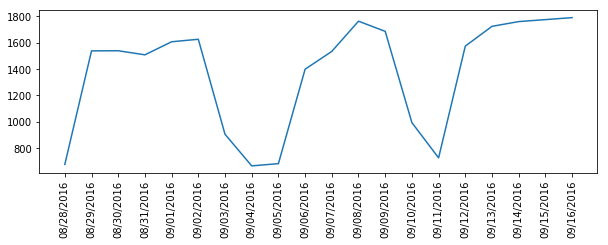

In [176]:
mask = ((data_daily["C/A"] == "A002") & 
        (data_daily["UNIT"] == "R051") & 
        (data_daily["SCP"] == "02-00-00") & 
        (data_daily["STATION"] == "59 ST"))

df2 = data_daily[mask]
dates = list(df2['DATE'])
counts = list(df2['DAILY_ENTRIES'])
plt.figure(figsize=(10,3))
plt.plot(dates,counts)
plt.xticks(rotation=90)

In [177]:
#Not sure why the mask is not picking up SCP
df2.SCP.unique()

array(['02-00-00'], dtype=object)

In [47]:
# Sanity check to verify that "C/A", "UNIT", "SCP", "STATION" is unique in daily_data
(data_daily
 .groupby(["C/A", "UNIT", "SCP", "STATION"], as_index=False)  
 .ENTRIES.count()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,ENTRIES
0,A002,R051,02-00-00,59 ST,20
3047,R154,R116,00-00-02,50 ST,20
3053,R155,R116,01-00-00,50 ST,20
3052,R154,R116,00-03-02,50 ST,20
3051,R154,R116,00-03-01,50 ST,20


#### Challenge 5
So far we've been operating on a single turnstile level, let's combine turnstiles in the same ControlArea/Unit/Station combo. There are some ControlArea/Unit/Station groups that have a single turnstile, but most have multiple turnstilea-- same value for the C/A, UNIT and STATION columns, different values for the SCP column.
We want to combine the numbers together -- for each ControlArea/UNIT/STATION combo, for each day, add the counts from each turnstile belonging to that combo.

In [50]:
turnstiles_comb = data.groupby(["C/A", "UNIT", "STATION", "DATE"], as_index=False)\
.ENTRIES.sum()

In [51]:
turnstiles_comb.head()

,C/A,UNIT,STATION,DATE,ENTRIES
0,A002,R051,59 ST,08/27/2016,339091352
1,A002,R051,59 ST,08/28/2016,334468157
2,A002,R051,59 ST,08/29/2016,339203462
3,A002,R051,59 ST,08/30/2016,339301052
4,A002,R051,59 ST,08/31/2016,339401155


In [52]:
turnstiles_comb[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_comb
                                                       .groupby(["C/A", "UNIT", "STATION"])["DATE", "ENTRIES"]
                                                       .transform(lambda grp: grp.shift(1)))

In [53]:
# Drop the rows for first date
turnstiles_comb.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [54]:
turnstiles_comb["DAILY_ENTRIES"] = turnstiles_comb.apply(get_daily_counts, axis=1, max_counter=1000000) 

334468157 339091352.0
339203462 334468157.0
323912798 339831285.0
340040055 323912798.0
914842622 784120298.0
784181628 914842622.0
505800915 433446948.0
433639514 505800915.0
506443164 433991236.0
434204310 506443164.0
43463967780 41802324756.0
41802237739 43463903644.0
43463885521 41802237739.0
72439794556 43463885521.0
57951823124 72439794556.0
43463860535 57951823124.0
37779242526 43463858870.0
32094640513 37779242526.0
37443769566 32094650411.0
88163244 105772552.0
105820395 88163244.0
123784733 106065005.0
106217874 123876265.0
141691153 106244466.0
106307475 141691153.0
88660193 106349622.0
124168963 88660193.0
51058318 42535070.0
59697432 51145332.0
51191632 59697432.0
59781586 51227889.0
51266157 59781586.0
246492564 211238713.0
211337911 246492564.0
258048778 525680154.0
124641741 258048778.0
107720592 80715733.0
80866666 107720592.0
107978907 80954642.0
81067070 107978907.0
95305203 81607220.0
889380141 762230001.0
762427458 889380141.0
889927657 762698074.0
762903709 889927

433377266 101626635.0
12610328598 10808802462.0
5608946247 6730624700.0
6730652308 5608946247.0
7852447558 6730652308.0
6730691009 7852447558.0
37975299 32532594.0
32568416 37975299.0
72081621 61774161.0
61809627 72095883.0
72126313 61809627.0
61836046 72126313.0
1165798253 777142705.0
777256879 1165798253.0
1036549546 777366662.0
1307624249 1036623604.0
777594977 1307624249.0
1036959859 777676161.0
777780914 1036959859.0
1296569425 777910670.0
187444983 160634733.0
163092941 139749894.0
139841767 163092941.0
50025893 42859733.0
42900634 50025893.0
50229026 43030348.0
43099088 50229026.0
32586471 24420081.0
24465149 32586471.0
118111219 101216787.0
101254260 118111219.0
185702454 101276494.0
101314212 185702454.0
38200678 32716121.0
32773323 38200678.0
38302109 32802234.0
32851261 38302109.0
54836314 32880187.0
38420447 54836314.0
33017879 38492777.0
38713705 33150872.0
1109272511 831945064.0
831967350 1109272511.0
970692842 832012971.0
832036338 970692842.0
90017823 77129470.0
7718880

348462063 298669726.0
298694610 348462063.0
20292366715 17393360953.0
17393552477 20292366715.0
23191986024 17393878670.0
20293124898 23191986024.0
17394201912 20293124898.0
166265525 124689812.0
145519595 166265525.0
124765945 145519595.0
167138208 143207264.0
143370609 167202363.0
199104655 170576145.0
170759115 199104655.0
229233478 152755942.0
152895507 229233478.0
204100549 153031290.0
178676536 204100549.0
153233382 178676536.0
179451518 153729474.0
38281503 39647764.0
39708925 37608434.0
53015597 39748551.0
39784404 53015597.0
1793573993 1812580992.0
1812950534 1793573993.0
2723622912 1815543467.0
326073391 217376947.0
217395019 326073391.0
102331071 87695111.0
87782716 102369078.0
130960007 113409482.0
89252407 76501032.0
76510161 89256923.0
290532995 248992320.0
249098732 290532995.0
207781759 249305865.0
249375089 207781759.0
85796414 102941461.0
102971305 85796414.0
2422387393 2153944999.0
2826131648 2422387393.0
2422419900 2826131648.0
359041216 307684800.0
347547737 359041

In [56]:
turnstiles_comb.head(10)

,C/A,UNIT,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,59 ST,08/28/2016,334468157,08/27/2016,339091352.0,0.0
2,A002,R051,59 ST,08/29/2016,339203462,08/28/2016,334468157.0,0.0
3,A002,R051,59 ST,08/30/2016,339301052,08/29/2016,339203462.0,97590.0
4,A002,R051,59 ST,08/31/2016,339401155,08/30/2016,339301052.0,100103.0
5,A002,R051,59 ST,09/01/2016,339500469,08/31/2016,339401155.0,99314.0
6,A002,R051,59 ST,09/02/2016,339599471,09/01/2016,339500469.0,99002.0
7,A002,R051,59 ST,09/03/2016,339682719,09/02/2016,339599471.0,83248.0
8,A002,R051,59 ST,09/04/2016,339731793,09/03/2016,339682719.0,49074.0
9,A002,R051,59 ST,09/05/2016,339774017,09/04/2016,339731793.0,42224.0
10,A002,R051,59 ST,09/06/2016,339831285,09/05/2016,339774017.0,57268.0


#### Challenge 6
Similarly, combine everything in each station, and come up with a time series of [(date1, count1),(date2,count2),...] type of time series for each STATION, by adding up all the turnstiles in a station.

In [57]:
data_station = data.groupby(["STATION", "DATE"], as_index=False)\
.ENTRIES.sum()

In [58]:
data_station.head()

,STATION,DATE,ENTRIES
0,1 AV,08/27/2016,8029376035
1,1 AV,08/28/2016,8473638796
2,1 AV,08/29/2016,8473727040
3,1 AV,08/30/2016,8473839770
4,1 AV,08/31/2016,8473957676


In [69]:
#Testing to see i can accomplish the same daily entries using the diff method
data_station[["DAILY_DIFF"]] = (data_station
                                .groupby(["STATION"])["ENTRIES"]
                                .transform(lambda grp: grp.diff()))

In [70]:
data_station.head()

,STATION,DATE,ENTRIES,DAILY_DIFF,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,1 AV,08/28/2016,8473638796,NaN,08/27/2016,8.029376e+09,0.0
2,1 AV,08/29/2016,8473727040,88244.0,08/28/2016,8.473639e+09,88244.0
3,1 AV,08/30/2016,8473839770,112730.0,08/29/2016,8.473727e+09,112730.0
4,1 AV,08/31/2016,8473957676,117906.0,08/30/2016,8.473840e+09,117906.0
5,1 AV,09/01/2016,8474077822,120146.0,08/31/2016,8.473958e+09,120146.0


In [71]:
data_station[["PREV_DATE", "PREV_ENTRIES"]] = (data_station
                                                       .groupby(["STATION"])["DATE", "ENTRIES"]
                                                       .transform(lambda grp: grp.shift(1)))

In [72]:
data_station.head()

,STATION,DATE,ENTRIES,DAILY_DIFF,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,1 AV,08/28/2016,8473638796,NaN,NaN,NaN,0.0
2,1 AV,08/29/2016,8473727040,88244.0,08/28/2016,8.473639e+09,88244.0
3,1 AV,08/30/2016,8473839770,112730.0,08/29/2016,8.473727e+09,112730.0
4,1 AV,08/31/2016,8473957676,117906.0,08/30/2016,8.473840e+09,117906.0
5,1 AV,09/01/2016,8474077822,120146.0,08/31/2016,8.473958e+09,120146.0


In [73]:
# Drop the rows for first date
data_station.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [74]:
data_station["DAILY_ENTRIES"] = data_station.apply(get_daily_counts, axis=1, max_counter=1000000) 

7506972111 8475086086.0
8475286706 7506972111.0
1004163012 937588590.0
938055385 1004341739.0
1004728776 938055385.0
938412697 1004728776.0
457485205 392014719.0
392251742 457485205.0
457902773 392370261.0
392589376 457902773.0
458307577 392739902.0
392957090 458307577.0
28204962649 29886320183.0
29886356445 28204962649.0
183716943 168021942.0
168153970 183716943.0
180737936 168289595.0
168404054 180737936.0
193285858 168404054.0
205785294 193285858.0
168621249 205785294.0
184772063 168951860.0
719172661 676936006.0
677126312 719172661.0
719386984 677126312.0
677314083 719386984.0
679900158 677507416.0
677683771 679900158.0
730739647 677786865.0
677974772 730739647.0
10277838558 10299059695.0
10311571721 10277838558.0
10299594493 10311571721.0
10311966561 10299594493.0
10244588810 10311966561.0
10233679283 10244588810.0
10270643250 10233926917.0
10234272518 10270643250.0
10253681378 10234272518.0
10275345673 10253681378.0
10234898448 10275345673.0
10256952624 10235038565.0
10235409992 

11555060417 11553973929.0
11555270314 11554203609.0
11554249262 11555270314.0
11555375287 11554249262.0
11555547420 11554443531.0
14991065923 11554559295.0
18428488571 14991065923.0
18427444738 18428488571.0
18428602674 18427444738.0
18428761045 18427653917.0
18427751052 18428761045.0
2057827403 2031713547.0
2032095475 2057840179.0
2163650597 2035216947.0
55517821 59255791.0
57855218 55760453.0
55952152 57855218.0
54051590 56358761.0
58449090 54051590.0
54801444 58449090.0
56687819 54976506.0
55510260 56687819.0
57332522 55510260.0
54743200 57332522.0
56264273 54743200.0
57640133 56264273.0
55398716 57640133.0
57254967 55398716.0
55840856 57254967.0
57999101 55840856.0
1883430949 1614348405.0
1614449890 1883475883.0
1345578438 1614648460.0
1372443452 1345578438.0
1614775933 1372443452.0
123439748 92559972.0
92609725 123439748.0
50098193 42923272.0
42957839 50098193.0
5198527677 4680709424.0
4680853093 5198579932.0
4678662116 4681533743.0
4681668155 4678662116.0
274058357 260693716.0
26

In [75]:
data_station.head(10)

,STATION,DATE,ENTRIES,DAILY_DIFF,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
2,1 AV,08/29/2016,8473727040,88244.0,08/28/2016,8.473639e+09,88244.0
3,1 AV,08/30/2016,8473839770,112730.0,08/29/2016,8.473727e+09,112730.0
4,1 AV,08/31/2016,8473957676,117906.0,08/30/2016,8.473840e+09,117906.0
5,1 AV,09/01/2016,8474077822,120146.0,08/31/2016,8.473958e+09,120146.0
6,1 AV,09/02/2016,8474197854,120032.0,09/01/2016,8.474078e+09,120032.0
7,1 AV,09/03/2016,8474312958,115104.0,09/02/2016,8.474198e+09,115104.0
8,1 AV,09/04/2016,8474395798,82840.0,09/03/2016,8.474313e+09,82840.0
9,1 AV,09/05/2016,8474466938,71140.0,09/04/2016,8.474396e+09,71140.0
10,1 AV,09/06/2016,8474549439,82501.0,09/05/2016,8.474467e+09,82501.0
11,1 AV,09/07/2016,8474671599,122160.0,09/06/2016,8.474549e+09,122160.0


#### Challenge 7
Plot the time series for a station.

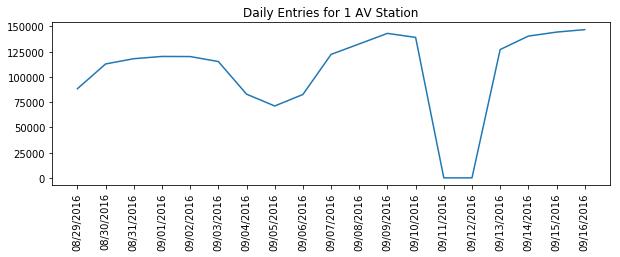

In [78]:
df = data_station[data_station['STATION']=='1 AV']
dates = list(df['DATE'])
counts = list(df['DAILY_ENTRIES'])
plt.figure(figsize=(10,3))
plt.plot(dates,counts)
plt.title("Daily Entries for 1 AV Station")
plt.xticks(rotation=90);

#### Challenge 8
Make one list of counts for one week for one station. Monday's count, Tuesday's count, etc. so it's a list of 7 counts. Make the same list for another week, and another week, and another week. plt.plot(week_count_list) for every week_count_list you created this way. You should get a rainbow plot of weekly commute numbers on top of each other.

In [79]:
station_day = data.groupby(["STATION", "DATE"], as_index=False)\
.ENTRIES.sum()

In [80]:
#Filter the dataframe down to one station
station_day = station_day[station_day['STATION']=='1 AV']

In [81]:
station_day['DATE'] = pd.to_datetime(station_day.DATE, format="%m/%d/%Y")

In [84]:
station_day.head()

,STATION,DATE,ENTRIES
0,1 AV,2016-08-27,8029376035
1,1 AV,2016-08-28,8473638796
2,1 AV,2016-08-29,8473727040
3,1 AV,2016-08-30,8473839770
4,1 AV,2016-08-31,8473957676


In [85]:
#Create a column for weekday name
station_day['DAY_OF_WEEK'] = station_day['DATE'].dt.day_name()

In [86]:
station_day.head()

,STATION,DATE,ENTRIES,DAY_OF_WEEK
0,1 AV,2016-08-27,8029376035,Saturday
1,1 AV,2016-08-28,8473638796,Sunday
2,1 AV,2016-08-29,8473727040,Monday
3,1 AV,2016-08-30,8473839770,Tuesday
4,1 AV,2016-08-31,8473957676,Wednesday


In [87]:
station_day[["PREV_DATE", "PREV_ENTRIES"]] = (station_day
                                                       .groupby(["STATION"])["DAY_OF_WEEK", "ENTRIES"]
                                                       .transform(lambda grp: grp.shift(1)))

In [88]:
# station_day.dropna(subset=["PREV_DATE"], axis=0, inplace=True)
station_day.head()

,STATION,DATE,ENTRIES,DAY_OF_WEEK,PREV_DATE,PREV_ENTRIES
0,1 AV,2016-08-27,8029376035,Saturday,NaN,NaN
1,1 AV,2016-08-28,8473638796,Sunday,Saturday,8.029376e+09
2,1 AV,2016-08-29,8473727040,Monday,Sunday,8.473639e+09
3,1 AV,2016-08-30,8473839770,Tuesday,Monday,8.473727e+09
4,1 AV,2016-08-31,8473957676,Wednesday,Tuesday,8.473840e+09


In [91]:
# Drop the rows for first date
station_day.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [92]:
station_day["DAILY_ENTRIES"] = station_day.apply(get_daily_counts, axis=1, max_counter=1000000)

8473638796 8029376035.0
7506972111 8475086086.0
8475286706 7506972111.0


In [93]:
station_day.head()

,STATION,DATE,ENTRIES,DAY_OF_WEEK,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,1 AV,2016-08-28,8473638796,Sunday,Saturday,8.029376e+09,0.0
2,1 AV,2016-08-29,8473727040,Monday,Sunday,8.473639e+09,88244.0
3,1 AV,2016-08-30,8473839770,Tuesday,Monday,8.473727e+09,112730.0
4,1 AV,2016-08-31,8473957676,Wednesday,Tuesday,8.473840e+09,117906.0
5,1 AV,2016-09-01,8474077822,Thursday,Wednesday,8.473958e+09,120146.0


In [94]:
#Create a new column to identify the week
station_day['WEEK'] = station_day['DATE'].dt.week

In [95]:
station_day.head()

,STATION,DATE,ENTRIES,DAY_OF_WEEK,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,WEEK
1,1 AV,2016-08-28,8473638796,Sunday,Saturday,8.029376e+09,0.0,34
2,1 AV,2016-08-29,8473727040,Monday,Sunday,8.473639e+09,88244.0,35
3,1 AV,2016-08-30,8473839770,Tuesday,Monday,8.473727e+09,112730.0,35
4,1 AV,2016-08-31,8473957676,Wednesday,Tuesday,8.473840e+09,117906.0,35
5,1 AV,2016-09-01,8474077822,Thursday,Wednesday,8.473958e+09,120146.0,35


In [96]:
station_day[station_day['WEEK']==37]

,STATION,DATE,ENTRIES,DAY_OF_WEEK,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,WEEK
16,1 AV,2016-09-12,8475286706,Monday,Sunday,7.506972e+09,0.0,37
17,1 AV,2016-09-13,8475413679,Tuesday,Monday,8.475287e+09,126973.0,37
18,1 AV,2016-09-14,8475553960,Wednesday,Tuesday,8.475414e+09,140281.0,37
19,1 AV,2016-09-15,8475698187,Thursday,Wednesday,8.475554e+09,144227.0,37
20,1 AV,2016-09-16,8475844857,Friday,Thursday,8.475698e+09,146670.0,37


In [97]:
week35_list = list(station_day[station_day['WEEK']==35]['DAILY_ENTRIES'])
week36_list = list(station_day[station_day['WEEK']==36]['DAILY_ENTRIES'])
week37_list = list(station_day[station_day['WEEK']==37]['DAILY_ENTRIES'])

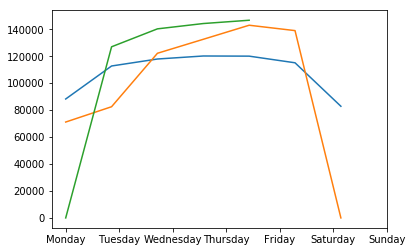

In [101]:
plt.plot(week35_list)
plt.plot(week36_list)
plt.plot(week37_list)
weekdays = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
ticks_x = np.linspace(0, 7, 7)
plt.xticks(ticks_x,weekdays);

#### Challenge 9
Over multiple weeks, sum total ridership for each station and sort them, so you can find out the stations with the highest traffic during the time you investigate

In [102]:
station = data.groupby(["STATION", "DATE"], as_index=False)\
.ENTRIES.sum()

In [103]:
station['DATE'] = pd.to_datetime(station.DATE, format="%m/%d/%Y")

In [104]:
station.head()

,STATION,DATE,ENTRIES
0,1 AV,2016-08-27,8029376035
1,1 AV,2016-08-28,8473638796
2,1 AV,2016-08-29,8473727040
3,1 AV,2016-08-30,8473839770
4,1 AV,2016-08-31,8473957676


In [117]:
station[["PREV_DATE", "PREV_ENTRIES"]] = (station
                                                       .groupby(["STATION"])["DATE", "ENTRIES"]
                                                       .transform(lambda grp: grp.shift(1)))

In [118]:
station.head()

,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,1 AV,2016-08-28,8473638796,NaT,NaN,0.0
2,1 AV,2016-08-29,8473727040,2016-08-28,8.473639e+09,88244.0
3,1 AV,2016-08-30,8473839770,2016-08-29,8.473727e+09,112730.0
4,1 AV,2016-08-31,8473957676,2016-08-30,8.473840e+09,117906.0
5,1 AV,2016-09-01,8474077822,2016-08-31,8.473958e+09,120146.0


In [119]:
station.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [120]:
station["DAILY_ENTRIES"] = station.apply(get_daily_counts, axis=1, max_counter=1000000)

7506972111 8475086086.0
8475286706 7506972111.0
1004163012 937588590.0
938055385 1004341739.0
1004728776 938055385.0
938412697 1004728776.0
457485205 392014719.0
392251742 457485205.0
457902773 392370261.0
392589376 457902773.0
458307577 392739902.0
392957090 458307577.0
28204962649 29886320183.0
29886356445 28204962649.0
183716943 168021942.0
168153970 183716943.0
180737936 168289595.0
168404054 180737936.0
193285858 168404054.0
205785294 193285858.0
168621249 205785294.0
184772063 168951860.0
719172661 676936006.0
677126312 719172661.0
719386984 677126312.0
677314083 719386984.0
679900158 677507416.0
677683771 679900158.0
730739647 677786865.0
677974772 730739647.0
10277838558 10299059695.0
10311571721 10277838558.0
10299594493 10311571721.0
10311966561 10299594493.0
10244588810 10311966561.0
10233679283 10244588810.0
10270643250 10233926917.0
10234272518 10270643250.0
10253681378 10234272518.0
10275345673 10253681378.0
10234898448 10275345673.0
10256952624 10235038565.0
10235409992 

17776405291 20667599128.0
1119299548 1116833419.0
1116942786 1119299548.0
963418641 1117146278.0
1117239485 963418641.0
1296062884 1117653266.0
1117778967 1296062884.0
1272547477 1157813828.0
1158948942 1272944408.0
993088410 962514444.0
962778460 993088410.0
1092929342 962778460.0
963047665 1092929342.0
970909260 963588228.0
780584646 970909260.0
964004765 780584646.0
1224451940 964098475.0
964349497 1224451940.0
2201025977 2178220530.0
2178654219 2201185272.0
2549360321 2178654219.0
2178966366 2549360321.0
2489690606 2179216864.0
3110605032 2489690606.0
2202391034 3110605032.0
2490243736 2202391034.0
2179976349 2490243736.0
3111442796 2180056709.0
2180348306 3111442796.0
4213313257 4141483318.0
4141604533 4213313257.0
4133194806 4141811059.0
4141918814 4133194806.0
4373786650 4141970298.0
4150300148 4373786650.0
4158558297 4150300148.0
4150444578 4158558297.0
4142350035 4150444578.0
2938006701 2667925779.0
2842587028 2938006701.0
2668002103 2842587028.0
1778761054 2668116813.0
266817

In [124]:
station.head(5)

,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
2,1 AV,2016-08-29,8473727040,2016-08-28,8.473639e+09,88244.0
3,1 AV,2016-08-30,8473839770,2016-08-29,8.473727e+09,112730.0
4,1 AV,2016-08-31,8473957676,2016-08-30,8.473840e+09,117906.0
5,1 AV,2016-09-01,8474077822,2016-08-31,8.473958e+09,120146.0
6,1 AV,2016-09-02,8474197854,2016-09-01,8.474078e+09,120032.0


In [136]:
station_total = station.groupby(['STATION'], as_index=False)['DAILY_ENTRIES'].sum()

In [137]:
station_total = station_total.sort_values(by='DAILY_ENTRIES', ascending=False)

In [138]:
station_total.head(5)

,STATION,DAILY_ENTRIES
236,HARRISON,9406338.0
265,LACKAWANNA,7936212.0
298,NEWARK HW BMEBE,6345738.0
295,NEWARK BM BW,5779846.0
214,FLUSHING-MAIN,5564516.0


#### Challenge 10
Make a single list of these total ridership values and plot it with

plt.hist(total_ridership_counts)

to get an idea about the distribution of total ridership among different stations.

This should show you that most stations have a small traffic, and the histogram bins for large traffic volumes have small bars.

In [129]:
total_ridership_counts = list(station_total['DAILY_ENTRIES'])

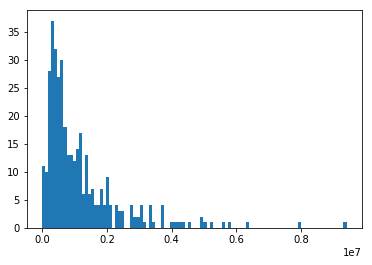

In [131]:
plt.hist(total_ridership_counts, bins = 100);

<BarContainer object of 373 artists>

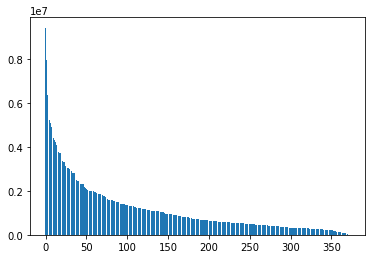

In [132]:
indices = range(len(total_ridership_counts))
plt.bar(indices, total_ridership_counts)